In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology
traj = md.load("Inputs/T300_plot/md.trr", top="Inputs/T300_plot/md.gro")  # Use .trr file instead of .xtc

# Compute phi and psi dihedral angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Extract time data
time = np.arange(0, traj.n_frames * traj.timestep, traj.timestep)

# Convert angles to degrees (optional)
phi_degrees = np.rad2deg(phi_angles)
psi_degrees = np.rad2deg(psi_angles)

# Plot phi and psi on the same plot
plt.figure(figsize=(12, 6))
plt.plot(time, phi_degrees, label="Phi")
plt.plot(time, psi_degrees, label="Psi")
plt.xlabel("Time (ps)")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.title("Phi and Psi Dihedral Angles vs. Time")
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Inputs/T300_plot/md.gro'

/tmp/ipykernel_154199/3870009007.py:20: RuntimeWarning: divide by zero encountered in log
  free_energy = -np.log(hist)


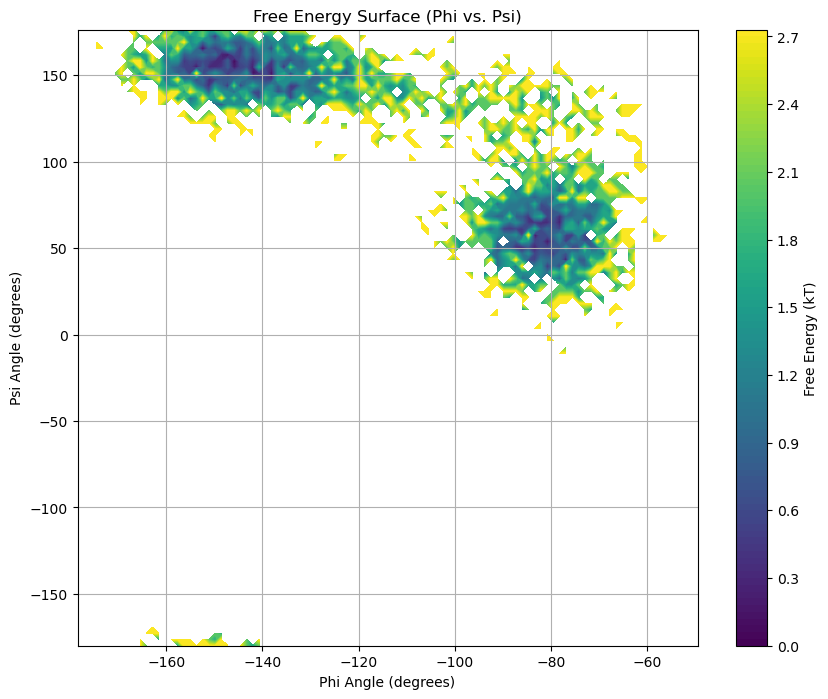

In [ ]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology
traj = md.load("Inputs/T300_plot/md.trr", top="Inputs/T300_plot/md.gro")  # Use .trr file instead of .xtc

# Compute phi and psi dihedral angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Convert angles to degrees (optional)
phi_degrees = np.rad2deg(np.hstack(phi_angles))
psi_degrees = np.rad2deg(np.hstack(psi_angles))

# Create a 2D histogram of phi and psi
hist, xedges, yedges = np.histogram2d(phi_degrees, psi_degrees, bins=(100, 100))

# Calculate the free energy
free_energy = -np.log(hist)

# Set minimum free energy to zero
min_free_energy = np.min(free_energy)
free_energy -= min_free_energy

# Create a contour plot of the free energy surface
plt.figure(figsize=(10, 8))
plt.contourf(xedges[:-1], yedges[:-1], free_energy.T, cmap='viridis', levels=100)
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('Phi Angle (degrees)')
plt.ylabel('Psi Angle (degrees)')
plt.title('Free Energy Surface (Phi vs. Psi)')
plt.grid(True)
plt.show()
